# Семинар 3: винеровский процесс

Винеровский процесс, как и пуассоновский, также имеет множество важных приложений.
Он описывает симметричное случайное блуждание, непрерывное во времени.
Винеровский процесс может возникать при исследовании броуновского движения,
динамики цен акций (за вычетом тренда), эволюции квантово-механических систем и стохастических космологических моделей.
Также процесс Винера часто используется как "шумовая составляющая" других случайных процессов.

Неформально винеровский процесс можно определить по аналогии с пуассоновским,
введя мелкую сетку дискретного времени с шагом $ \Delta t $.
Пусть процесс стартует из нуля и на каждом очередном шаге по времени
делает независимый скачок на некоторую случайную величину с матожиданием,
равным нулю, и дисперсией, равной $ \Delta t $
(это сделано для того, чтобы дисперсия сечения процесса росла линейно с течением времени независимо от $ \Delta t $).
Полученные случайные блуждания при $ \Delta t \to +0 $ и описываются винеровским процессом.

Промоделируем винеровский процесс при помощи приведённого "наивного" определения.
В качестве шагов возьмём $ \pm \sqrt{\Delta t} $, выбираемые с одинаковыми вероятностями.

In [1]:
import numpy as np
import pandas as pd

# Фиксируем зерно для генертора случайных чисел.
np.random.seed(seed=42)

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

font = {'size'   : 14}
matplotlib.rc('font', **font)

In [3]:
# Раскомментировать, если следующая ячейка не работает.
#import sys
#sys.path.insert(1, ".")

In [4]:
from utils.plots import plot_realizations, plot_slices, plot_correlation_function

In [5]:
from scipy.stats import bernoulli

In [6]:
def generate_wiener_sp_naive(T, realizations_number=25):
    """
    Сгенерировать realizations_number реализаций винеровского процесса наивным методом.
    """
    
    T = np.sort(T)
    realizations = np.zeros((realizations_number, T.shape[0]))
    
    # Для каждого очередного момента времени производится независимая генерация произошедших
    # на пройденном интервале скачков согласно бернуллиевскому распределению с параметром p = 0.5.
    # Величина скачков определяется \sqrt{\Delta t}.
    bern_rv = bernoulli(p=0.5)
    for index in range(T.shape[0] - 1):
        realizations[:,index + 1] = realizations[:,index] + np.sqrt(T[index+1] - T[index])*(2*bern_rv.rvs((realizations_number)) - 1)
    
    return realizations

In [7]:
T_naive = np.linspace(0.0, 10.0, 1000)
wiener_sp_naive = generate_wiener_sp_naive(T_naive, realizations_number=10)

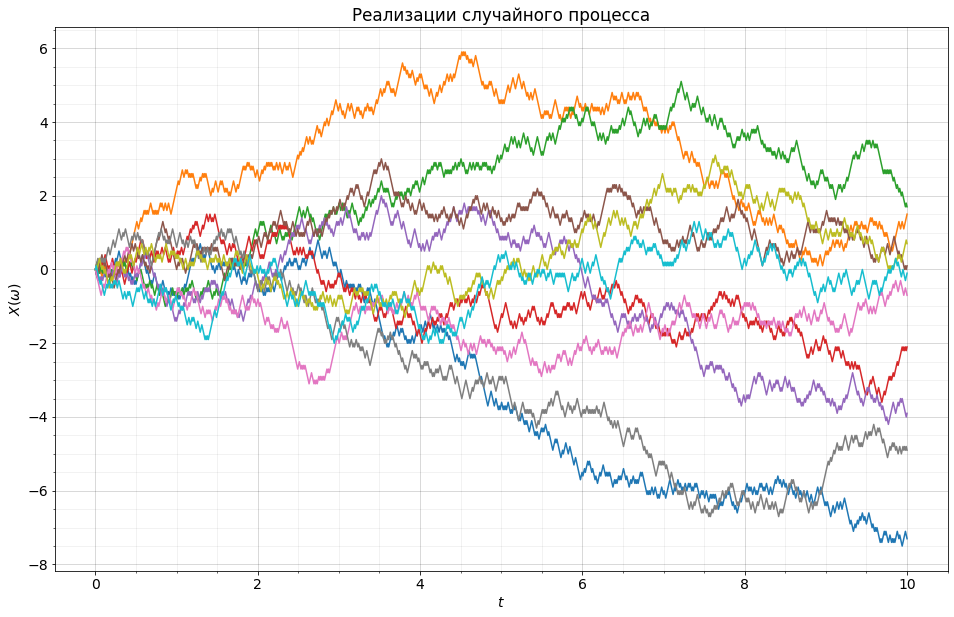

In [8]:
plot_realizations(T_naive, wiener_sp_naive)

Дадим теперь формальное определение.

**Винеровским процессом с интенсивностью** называется случайный процесс $ W \colon \Omega \times [0; +\infty) \to \mathbb{R} $ такой, что
1. $ W_0 \underset{\text{п.н.}}{=} 0 $.
2. $ W $ - процесс с независимыми приращениями.
3. $ W_t - W_s \sim \mathcal{N}(|t - s|) $.

Это одно из эквивалентных определений.
Промоделируем его.
Для этого достаточно лишь в наивной функции генерации заменить бернуллиевское распределение шагов на нормальное.

In [9]:
from scipy.stats import norm

In [10]:
def generate_wiener_sp_1(T, realizations_number=25):
    """
    Сгенерировать realizations_number реализаций винеровского процесса наивным методом.
    """
    
    T = np.sort(T)
    realizations = np.zeros((realizations_number, T.shape[0]))
    
    # Для каждого очередного момента времени производится независимая генерация произошедших
    # на пройденном интервале скачков согласно бернуллиевскому распределению с параметром p = 0.5.
    # Величина скачков определяется \sqrt{\Delta t}.
    step_rv = norm()
    for index in range(T.shape[0] - 1):
        realizations[:,index + 1] = realizations[:,index] + np.sqrt(T[index+1] - T[index])*step_rv.rvs((realizations_number))
    
    return realizations

In [11]:
T_1 = np.linspace(0.0, 10.0, 1000)
wiener_sp_1 = generate_wiener_sp_1(T_1, realizations_number=10)

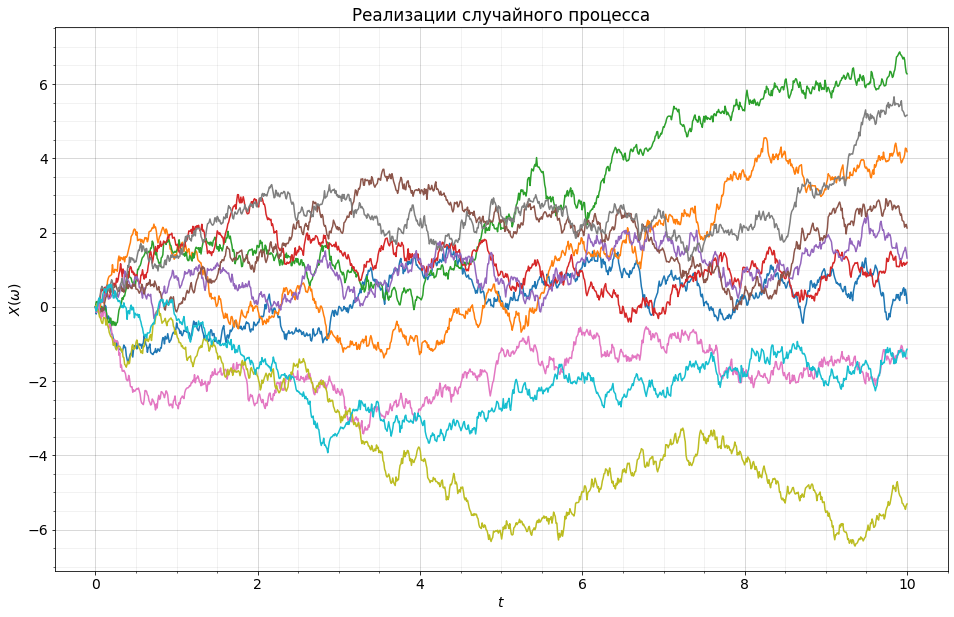

In [12]:
plot_realizations(T_1, wiener_sp_1)

In [13]:
# Для конспекта семинаров.
#dataframe = pd.DataFrame(data=wiener_sp_1.T, columns=[f"realization_{index}" for index in range(wiener_sp_1.shape[0])])
#dataframe.insert(0, "time", T_1)
#dataframe.to_csv("../data/Wiener_realizations.csv", index=False)

## Гауссовские процессы

Винеровский процесс - лишь один из **гауссовских процессов** (т.е. процессов, любой вектор сечений которых является гауссовским вектором).
Любой гауссовский процесс однозначно (с точностью до модификации) задаётся своей функцией среднего и ковариационной/корреляционной функцией.

Промоделируем гауссовский процесс из задачи № 2.22: $ m_X(t) = 0 $, $ R_X(s, t) = e^{-|s - t|} $.

In [14]:
from scipy.stats import multivariate_normal

In [15]:
def generate_gaussian_sp_text_exercise_expabs(T, realizations_number=5):
    """
    Сгенерировать realizations_number реализаций случайного процесса из текстовой задачи № 2.22.
    """
    
    T = np.sort(T)
    realizations = np.zeros((realizations_number, T.shape[0]))
    
    # Поскольку неизвестно, является ли процесс случайным процессом с независимыми приращениями (по всей видимости, нет),
    # его требуется моделировать "в лоб", через конечномерные распределения.
    
    # Построение матрицы ковариации.
    cov_matrix = np.exp(-np.abs(T[None,:] - T[:,None]))
    realizations = multivariate_normal(cov=cov_matrix).rvs((realizations_number))
    
    return realizations

In [16]:
T_text_exercise_expabs = np.linspace(0.0, 10.0, 1000)
gaussian_sp_text_exercise_expabs = generate_gaussian_sp_text_exercise_expabs(T_text_exercise_expabs, realizations_number=3)

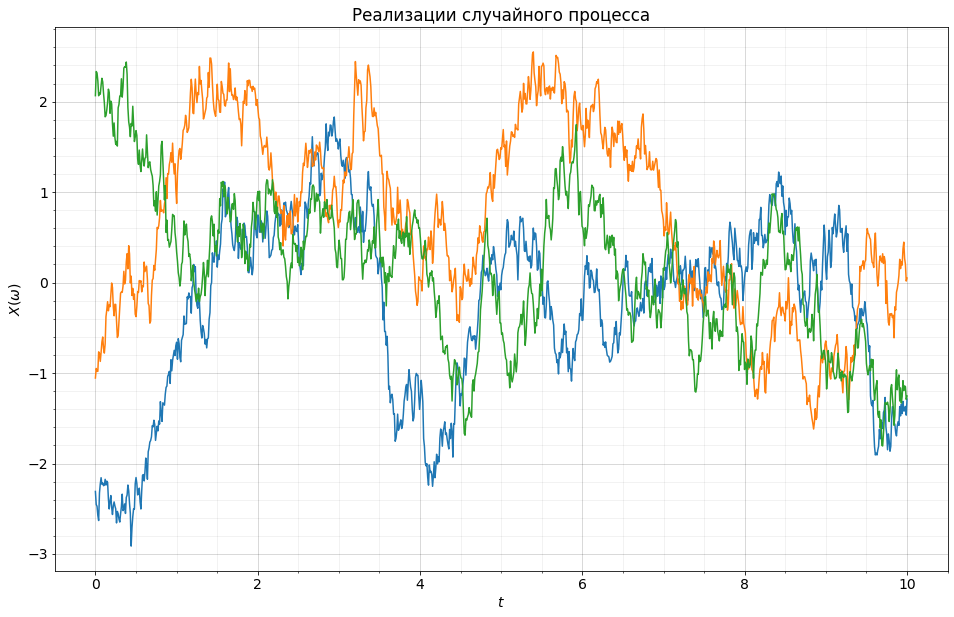

In [17]:
plot_realizations(T_text_exercise_expabs, gaussian_sp_text_exercise_expabs)

In [18]:
# Для конспекта семинаров.
#dataframe = pd.DataFrame(data=gaussian_sp_text_exercise_expabs.T, columns=[f"realization_{index}" for index in range(gaussian_sp_text_exercise_expabs.shape[0])])
#dataframe.insert(0, "time", T_text_exercise_expabs)
#dataframe.to_csv("../data/Gaussian_expabs_realizations.csv", index=False)